### Script is designed to identify most abundant Phylum level microbiome composition across some cohort subjects.
Input files are the output of kraken-report <br>
Output is the boxplot and a table <br>
You can caclulate reads number or reads percent

In [2]:
# import packages
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import os
import glob

## Get stat by Phylum

In [56]:
# if you want to calculate reads number:
#tp = 'rn1'
#lb = 'Reads number'
# if you want to calculate reads percent:
tp = 'perc'
lb = 'Relative abundance (%)'

In [84]:
pathD = os.path.abspath(os.path.dirname('./input/BGI_Kraken2_1908/')) 
flist = [os.path.basename(x) for x in glob.glob(pathD + '/lab*')]

print('Smpls - '+str(len(flist)))

COLUMN_NAMES = ['Smpl','unclassified', 'Firmicutes', 'Actinobacteria', 'Bacteroidetes', 'Proteobacteria', 
                'Fusobacteria', 'Verrucomicrobia','Other']
phySTAT = pd.DataFrame(columns=COLUMN_NAMES)

for smpl in flist:
    tax = pd.read_csv(pathD + '/' + str(smpl), sep='\t', 
                  names=["perc", "rn1", "rn2", 'type','id', "name"])
    tax = tax.replace("\s\s+" , " ",regex=True)
    tao = tax[tax['type'] == 'P']
    taoSm = tao[(tao['name'] != 'unclassified')&(tao['id'] != 976)&
                     (tao['id'] != 1239)&(tao['id'] != 1224)&
                     (tao['id'] != 201174)&(tao['id'] != 74201)&
                        (tao['id'] != 32066)]
    
    data = {'Smpl': [smpl[6:23]], 
            'unclassified': [tax[tax['name'] == 'unclassified'].iloc[0][tp]],
            'Bacteroidetes': [tax[tax['id'] == 976].iloc[0][tp]], 
            'Firmicutes': [tax[tax['id'] == 1239].iloc[0][tp]],
            'Proteobacteria': [tax[tax['id'] == 1224].iloc[0][tp]], 
            'Actinobacteria': [tax[tax['id'] == 201174].iloc[0][tp]], 
            'Verrucomicrobia': [tax[tax['id'] == 74201].iloc[0][tp]],
            'Fusobacteria': [tax[tax['id'] == 32066].iloc[0][tp]], 
            'Other': taoSm['perc'].sum()}
    df = pd.DataFrame(data)
    
    phySTAT = phySTAT.append(df)

phySTAT=phySTAT.set_index(['Smpl'])
phySTAT=phySTAT.sort_values(by=['unclassified'], ascending=False)
phySTAT.to_csv('results/kraken_phylumSTAT_'+str(tp)+'.csv')

phySTAT.head()

Smpls - 1908


,unclassified,Firmicutes,Actinobacteria,Bacteroidetes,Proteobacteria,Fusobacteria,Verrucomicrobia,Other
Smpl,,,,,,,,
VFOJNG_E100009727,78.20,8.27,1.59,5.16,3.88,0.06,0.04,1.67
VI8VZ8_E100013458,77.95,8.68,1.39,4.64,3.75,0.05,1.11,1.50
VL6UTA_E100010953,76.01,8.65,1.48,5.75,4.70,0.12,0.06,2.07
VU5679_E100013124,75.46,8.72,1.32,6.77,3.91,0.14,0.14,2.36
VY5LA8_E100013128,75.06,9.50,0.82,8.42,2.80,0.15,0.06,2.24


### Make pictures with phylum stat

<Figure size 432x288 with 0 Axes>

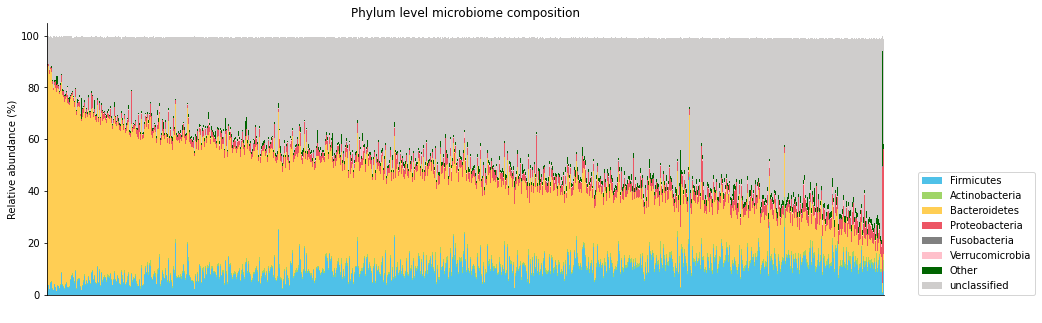

In [85]:
phySTAT1 = phySTAT[['Firmicutes', 'Actinobacteria', 'Bacteroidetes', 'Proteobacteria', 
                'Fusobacteria', 'Verrucomicrobia','Other','unclassified']]
phySTAT1 = phySTAT1.sort_values(by=['Bacteroidetes'], ascending=False)

c = ['#4fc1e8', '#a0d568', '#ffce54', '#ed5564', 'grey', 'pink','darkgreen','#cfcdcc']

import matplotlib.pyplot as plt
fig = plt.figure()

plt = phySTAT1.plot.bar(rot=0, stacked=True, color = c, figsize=(15, 5), width=1)
plt.legend(loc=(1.04,0))
plt.tick_params(axis='x', labelrotation=90)

plt.set_xticklabels([])
plt.spines['top'].set_visible(False)
plt.spines['right'].set_visible(False)
plt.tick_params(bottom = False)

from matplotlib import pyplot as plt
plt.title("Phylum level microbiome composition")
plt.ylabel(lb)
plt.xlabel(" ")
plt.savefig('results/Phylum_'+str(tp)+'_1.png', dpi = 400, bbox_inches = 'tight')